In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def d1(S,K,T,r,sigma):
    return (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))

def d2(S,K,T,r,sigma):
    return (np.log(S/K)+(r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))

def call(S,K,T,r,sigma):
    d_1 = d1(S,K,T,r,sigma) 
    d_2 = d2(S,K,T,r,sigma) 
    return S*stats.norm.cdf(d_1) - K*np.exp(-r*T)*stats.norm.cdf(d_2)

def put(S,K,T,r,sigma):
    d_1 = d1(S,K,T,r,sigma) 
    d_2 = d2(S,K,T,r,sigma) 
    return -S*stats.norm.cdf(-d_1) + K*np.exp(-r*T)*stats.norm.cdf(-d_2)

/anaconda3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log


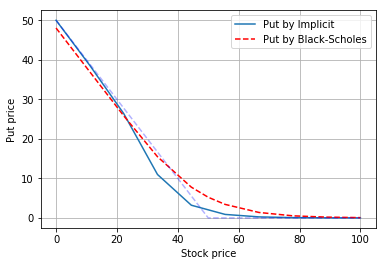

In [2]:
# Implicit - Put

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import dia_matrix
from scipy.interpolate import interp1d
from scipy.sparse.linalg import spsolve

S = 50; K = 50; T = 1; r = 0.1; v = 0.4;
 
Smax = 100; Smin = 0;
NS = 10; NT = 100; 
dS = (Smax-Smin)/(NS-1); dT = (T-0)/(NT-1);

P = np.zeros((NS,NT));
Stock = np.linspace(Smin,Smax,NS).reshape((NS,1));
P[0,:]  = K-Smin;
P[-1,:] = 0;
P[:,-1] = np.maximum(K-Stock,0).reshape((NS,));

span = np.arange(0,NS-2) 
a = -0.5*v**2*dT*((Smin/dS)+span)**2+0.5*r*dT*((Smin/dS)+span);
b = 1+r*dT+v**2*dT*((Smin/dS)+span)**2;
c = -0.5*v**2*dT*((Smin/dS)+span)**2-0.5*r*dT*((Smin/dS)+span);
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.dia_matrix.html#scipy.sparse.dia_matrix
# dia_matrix((data, offsets), shape=(M, N))
data = [a, b, c];
offsets = [-1,0,1];
A = dia_matrix((data, offsets), shape=(NS-2, NS-2));

for t in range(NT-1,0,-1):
    d = np.zeros(NS-2); d[0] = a[0]*P[0,t-1]; d[-1] = c[-1]*P[-1,t-1]
    P[1:-1,t-1] = spsolve(A, P[1:-1,t].reshape(NS-2)-d);

x = np.linspace(Smin,Smax,NS); 
f = interp1d(Stock.reshape((NS,)), P[:,0], kind='cubic');
y = f(x)
plt.plot(x,y,label='Put by Implicit');

x1 = np.sort(np.append(x,K)); 
y1 = put(x1,K,r,v,T); 
plt.plot(x1,y1,'--r',label='Put by Black-Scholes'); 

y2 = np.maximum(K-x1,0);
plt.plot(x1,y2,'--b',alpha=0.3);

plt.legend()
plt.grid(True);
plt.xlabel('Stock price'); plt.ylabel('Put price')
plt.show()